In [18]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.data import astronaut
from skimage.color import rgb2gray

## Compute SVD

Image shape: (512, 512)


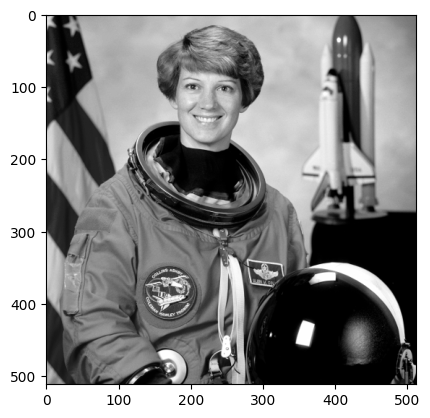

In [20]:
img = rgb2gray(astronaut())
print(f'Image shape: {img.shape}')
U, s, VT = np.linalg.svd(img, full_matrices=True)

plt.imshow(img, cmap='gray')
plt.show()

## Visualizing dyads

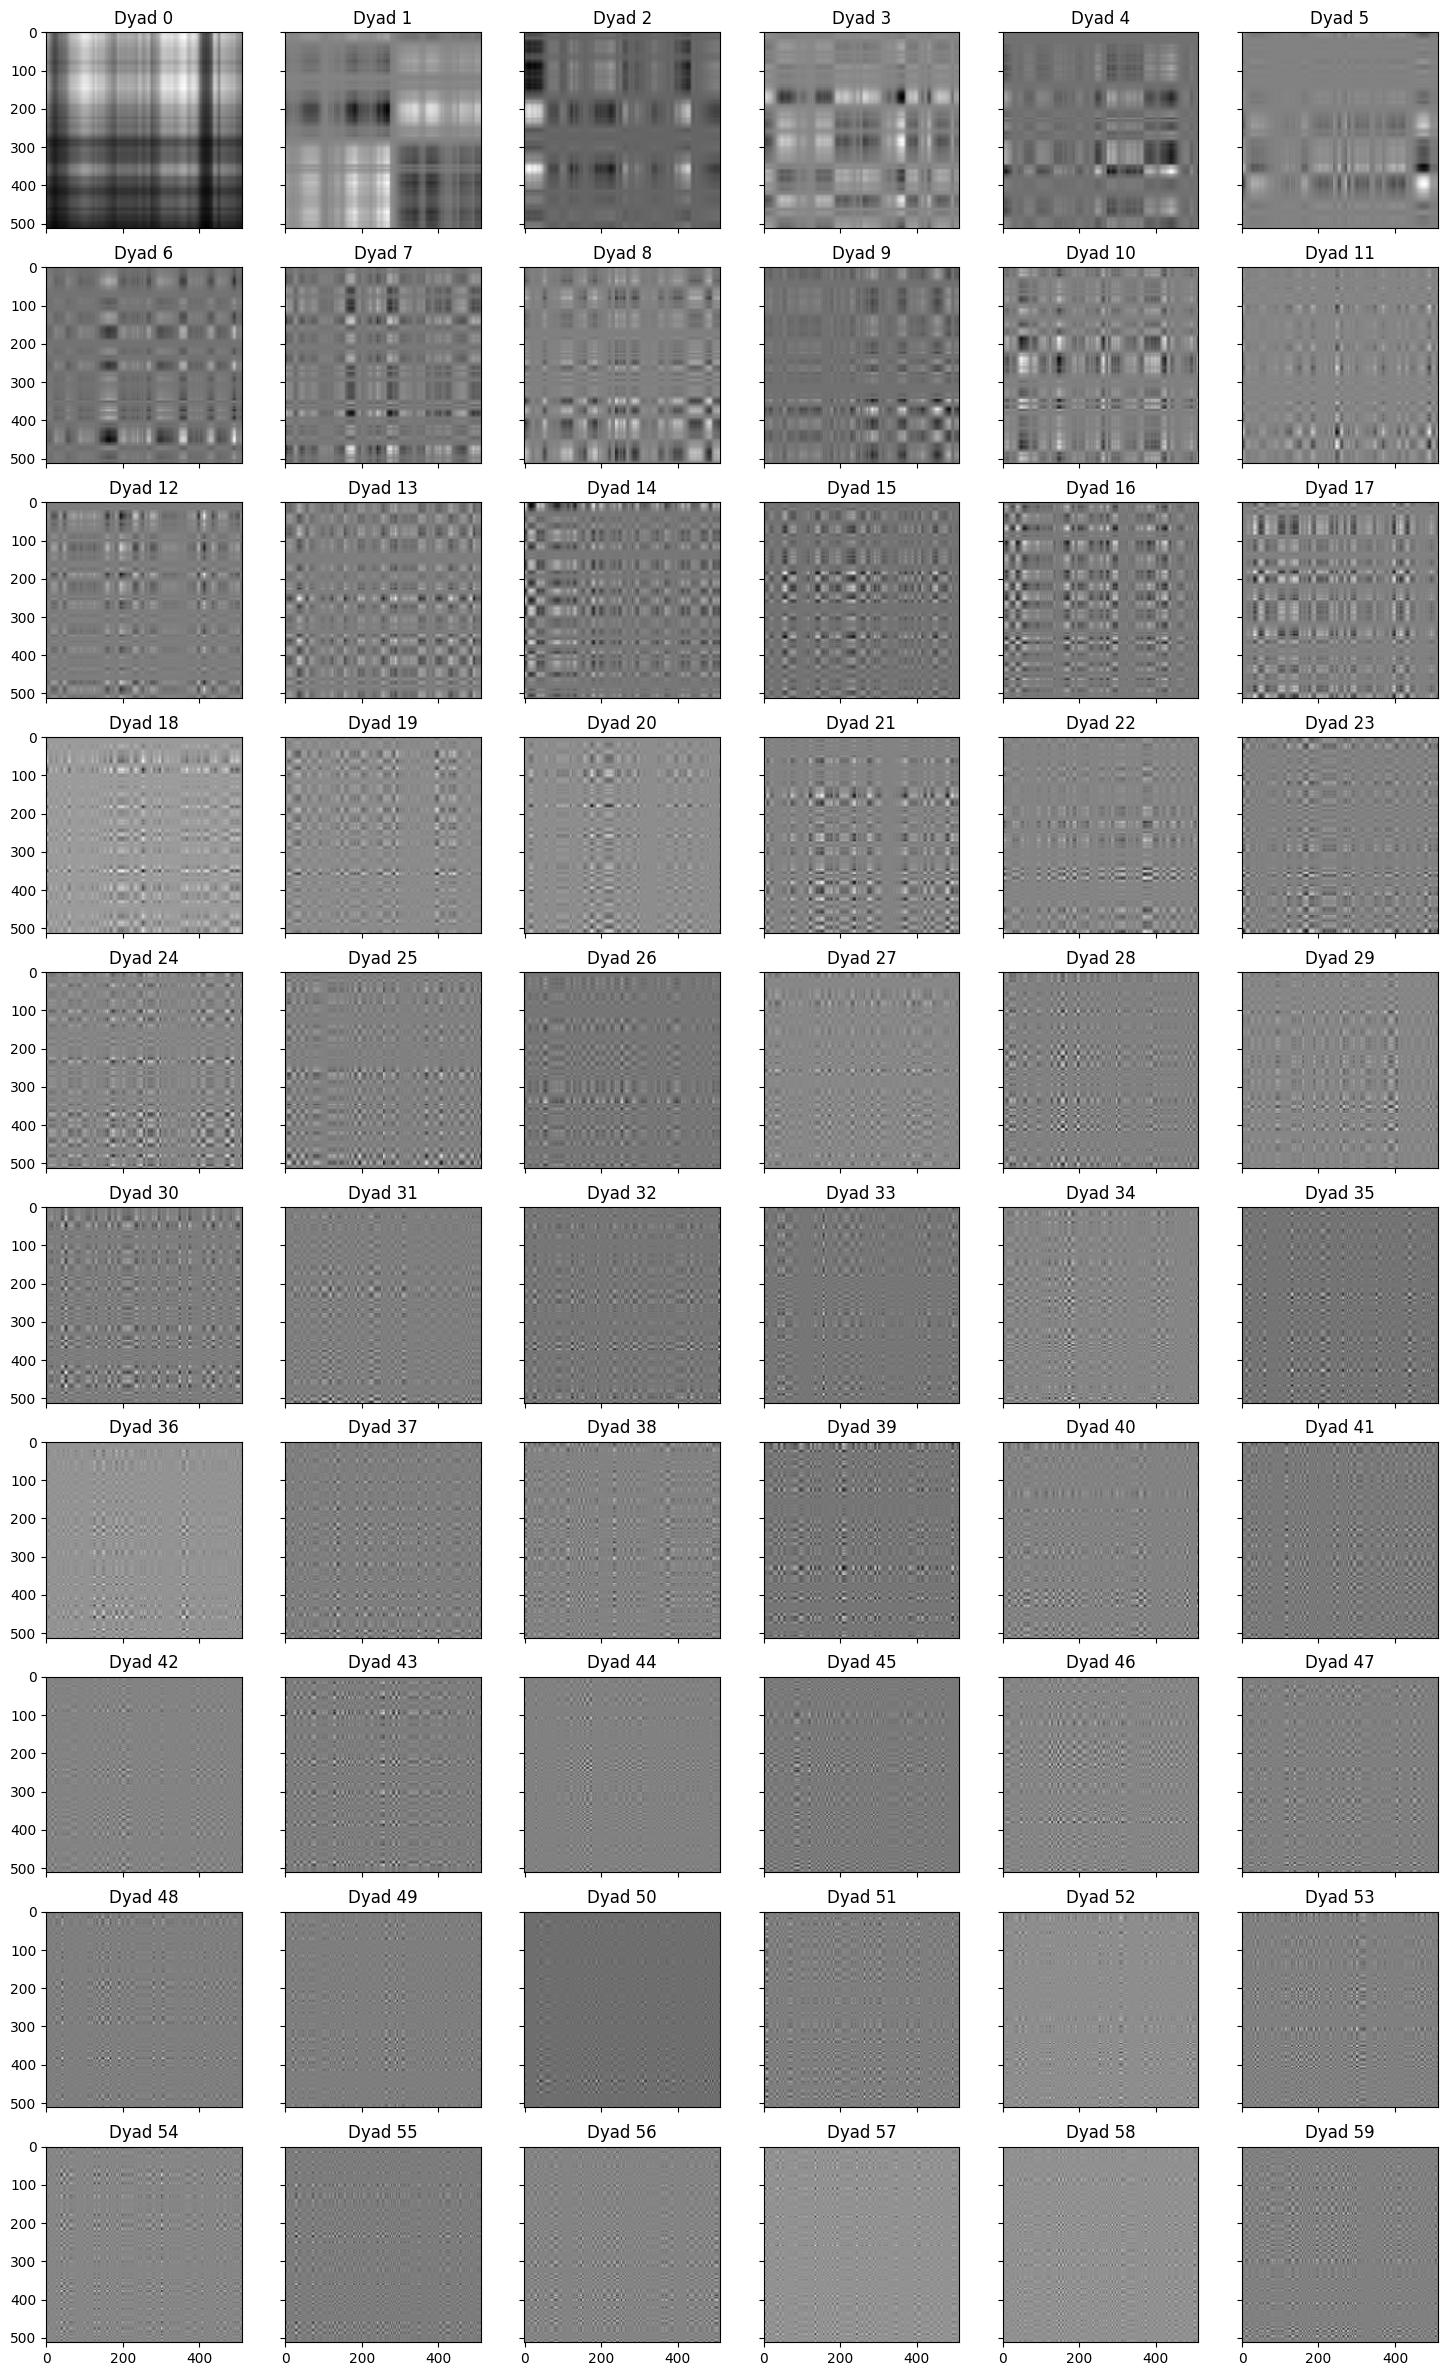

In [38]:
nrows = 10
ncols = 6
n_dyads = ncols*nrows
dyads = []

fig, axs = plt.subplots(figsize=(3*ncols, 3*nrows), nrows=nrows, ncols=ncols, sharex=True, sharey=True)

iter = 0
for i in range(nrows):
    for j in range(ncols):
        # given two 1-dimensional vectors, np.outer returns a MATRIX with the PAIRWISE product of the two vectors
        dyad = np.outer(U[:, iter] * s[iter], VT[iter, :]) 
        ax = axs[i][j]
        ax.imshow(dyad, cmap='gray')
        ax.set_title(f"Dyad {iter}")

        iter+=1


#### We can notice that the information contained in each dyad decreases when increasing the index $i$. This is a consequence of the fact that the $i$-th singular value $\sigma_i$ represent the importance of the $i$-th dyad. 

## Plot the singular values of the matrix representing the image

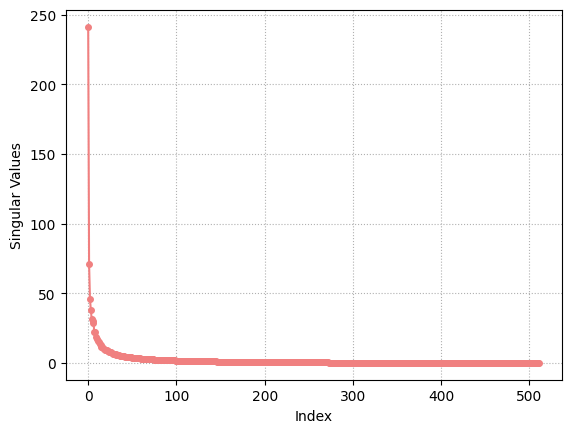

In [64]:
plt.plot(s, marker='o', color='lightcoral', ms=4)
plt.grid(linestyle=':')
plt.ylabel('Singular Values')
plt.xlabel('Index')
plt.show()

#### Only few of the singular values are far enough from zero

## K-Rank approximation

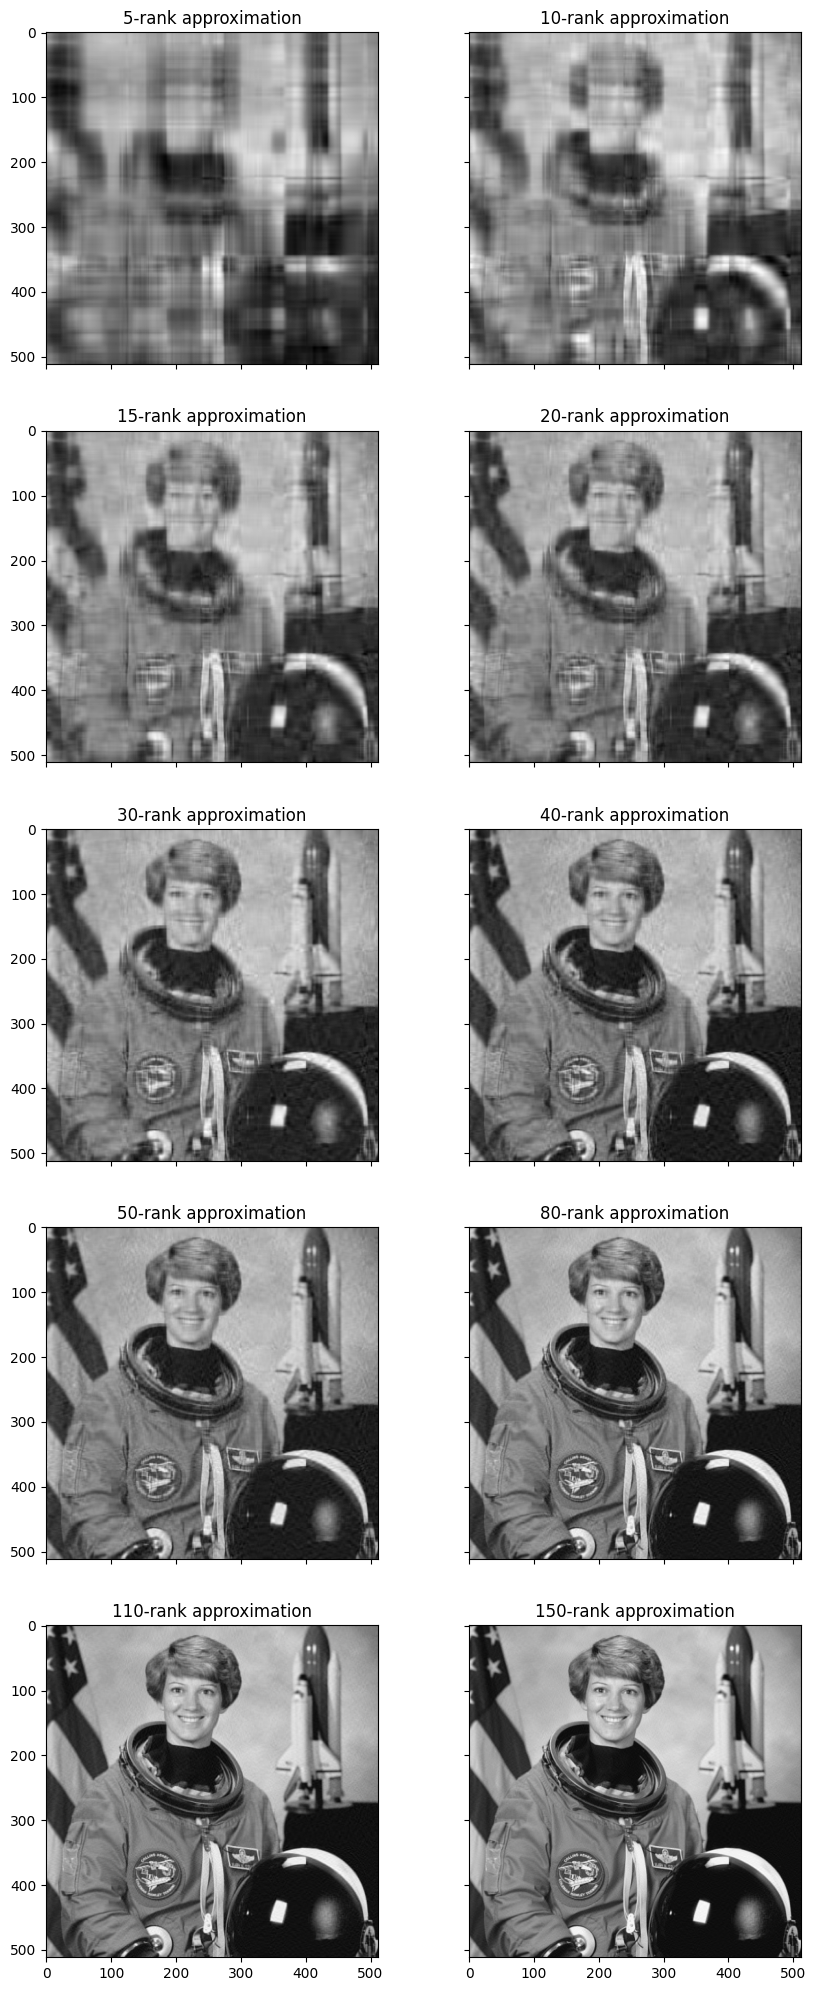

In [68]:
k_vals = [5, 10, 15, 20, 30, 40, 50, 80, 110, 150]

def k_rank_approx(matrix, k):
    approx = np.zeros_like(matrix)
    for i in range(k):
        approx += s[i] * np.outer(U[:, i], VT[i, :])

    return approx


nrows=5
ncols=2
fig, axs = plt.subplots(figsize=(5*ncols, 5*nrows), nrows=nrows, ncols=ncols, sharex=True, sharey=True)

iter = 0
for i in range(nrows):
    for j in range(ncols):
        k = k_vals[iter]
        k_approx = k_rank_approx(img, k)
        ax = axs[i][j]
        ax.imshow(k_approx, cmap='gray')
        ax.set_title(f"{k}-rank approximation")

        iter+=1


As we can see from the singular values plot and from the k-rank approximations, less then 100 singular values are sufficient to have a good reconstruction of the image.

## Approximation error

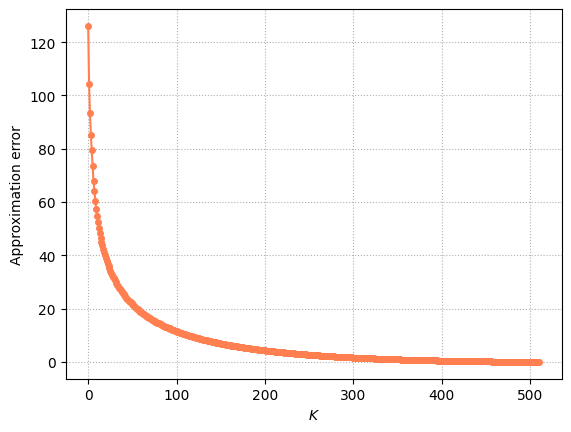

In [70]:
errs = []

for k in range(1, s.shape[0]):
    errs.append(np.linalg.norm(img-k_rank_approx(img, k), ord='fro'))

plt.plot(errs, marker='o', ms=4, color='coral')
plt.grid(linestyle=':')
plt.ylabel('Approximation error')
plt.xlabel('$K$')
plt.show()

## Compression factor

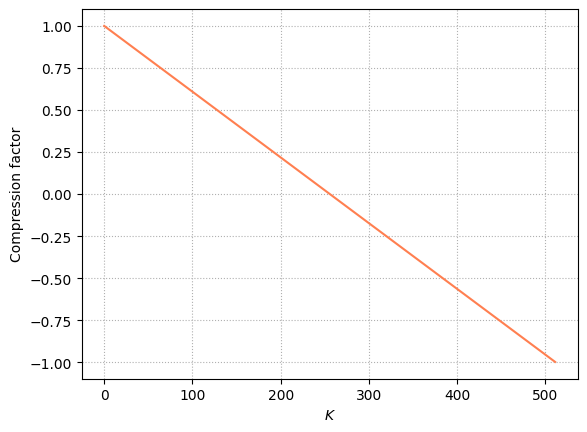

In [74]:
c_factors = []
m = U.shape[0]
n = VT.shape[0]
for k in range(s.shape[0]):
    # k*(m+n+1) is the number of values needed to save the k-rank approximation
    # m*n is the number of values needed to save the entire image
    # the fraction is the percentage of pixel to save in memory
    # 1 - percentage is the percentage of the pixel saved
    c_factors.append(1-(k*(m+n+1) / (m*n)))

plt.plot(c_factors, color='coral')
plt.grid(linestyle=':')
plt.ylabel('Compression factor')
plt.xlabel('$K$')
plt.show()


We can find the value $k$ for which the the compressed image requires the same amount of informations of those of the uncompressed image by imposing $\begin{equation} 1 - \frac{k*(m + n + 1)}{m * n} = 0. \end{equation}$ Making the math, we obtain $\begin{equation}k = \frac{m * n}{m + n + 1}.\end{equation}$ The value for which $c_k\le0$ is 256. As we can see from the plot, the compression factor is inverse proportional to $k$, meaning that higher is $k$, less is the amount of memory saved. Starting from $k = 256$ it is better to save the original image rather then saving the k-rank approximation.

In [80]:
k = (m*n)/(m+n+1)
print(k)

app_err = np.linalg.norm(img-k_rank_approx(img, int(k+1)), ord='fro')
print(app_err)

255.75024390243902
2.5760597106598815
